In [3]:
import pytz
import datetime as dt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
actDf = pd.read_csv('C:\\Users\\Mechio\\Documents\\giridhar\\sleep data\\Activity_cards with demographic data_2018_02_27.csv')
sleepTimes = pd.read_csv('C:\\Users\\Mechio\\Documents\\giridhar\\sleep data\\sleepTimes_.csv')
bmpDf = pd.read_csv('C:\\Users\\Mechio\\Documents\\giridhar\\sleep data\\bpm.csv')
actiDf = pd.read_csv('C:\\Users\\Mechio\\Documents\\giridhar\\sleep data\\acti.csv')

actDf.info()
sleepTimes.info()
bmpDf.info()
actiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025359 entries, 0 to 1025358
Data columns (total 13 columns):
Unnamed: 0        1025359 non-null int64
user_id           1025359 non-null object
activity_start    1025359 non-null object
activity_end      1025359 non-null object
cardtype          1025359 non-null int64
autocreated       1025359 non-null bool
gender            1025359 non-null object
city              1025359 non-null object
state_name        1025359 non-null object
state_id          1025359 non-null int64
birthdate         1025359 non-null object
weight            1025359 non-null int64
height            1025359 non-null int64
dtypes: bool(1), int64(5), object(7)
memory usage: 94.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47549 entries, 0 to 47548
Data columns (total 24 columns):
Unnamed: 0        47549 non-null int64
user_id           47549 non-null object
activity_start    47549 non-null object
activity_end      47549 non-null object
cardtype          47

In [3]:
test_sleepTimes = sleepTimes.iloc[:10000,:]
test_sleepTimes = test_sleepTimes.drop(['RHR','restless_mins','duration'],axis=1)
test_sleepTimes['activity_start'] = pd.to_datetime(test_sleepTimes['activity_start'])
test_sleepTimes['activity_end'] = pd.to_datetime(test_sleepTimes['activity_end'])
test_sleepTimes

Unnamed: 0     user_id      activity_start        activity_end  \
0              0  sOE4yUxbfk 2018-02-27 06:34:39 2018-02-27 15:25:07   
1              1  1Fq7im2mMt 2018-02-26 02:25:37 2018-02-26 17:49:38   
2              2  1Fq7im2mMt 2018-02-26 02:25:37 2018-02-26 17:49:38   
3              3  tgjMnLnIcS 2018-02-14 04:52:33 2018-02-14 09:08:44   
4              4  oELpnPJOLe 2018-02-05 06:30:26 2018-02-05 11:31:42   
5              5  u9zr99RCmK 2018-02-08 02:59:38 2018-02-08 11:36:03   
6              6  u9zr99RCmK 2018-02-08 02:59:38 2018-02-08 11:36:03   
7              7  ZRBOIRnNik 2018-02-27 06:38:22 2018-02-27 14:03:47   
8              8  DmBFiq98q6 2018-02-20 08:03:37 2018-02-20 16:16:17   
9              9  97wnzgkvis 2018-02-10 00:01:48 2018-02-10 12:11:24   
10            10  97wnzgkvis 2018-02-12 05:19:48 2018-02-12 12:05:08   
11            11  R6Dwlv7cEh 2018-02-08 05:26:40 2018-02-08 12:28:02   
12            12  W2ZpaWGBqL 2018-02-07 06:20:41 2018-02-07 11:16:55   
13            13  yH6vluHpll 2018-02-12 03:19:37 2018-02-12 10:55:01   
14            14  tQSsTbTzgI 2018-02-26 00:58:42 2018-02-26 10:28:11   
15            15  GRMUv6WvI5 2018-02-16 03:11:48 2018-02-16 12:33:19   
16            16  AIfDlRw7LM 2018-02-05 09:53:40 2018-02-05 14:13:53   
17            17  0KuVo7VK9O 2018-02-18 06:05:37 2018-02-18 13:17:59   
18            18  vuXdz6rHlh 2018-02-26 11:33:45 2018-02-26 12:14:44   
19            19  wTH85lVJMo 2018-02-06 03:45:36 2018-02-06 11:35:58   
20            20  Lv916rGjO2 2018-02-16 04:23:00 2018-02-16 11:17:19   
21            21  Lv916rGjO2 2018-02-16 04:23:00 2018-02-16 11:17:19   
22            22  6iYOD6hD4A 2018-02-12 11:16:59 2018-02-12 17:15:18   
23            23  GJLXdLl9ew 2018-02-14 06:57:22 2018-02-14 14:00:42   
24            24  GJLXdLl9ew 2018-02-14 06:57:22 2018-02-14 14:00:42   
25            25  72HUKnEBXH 2018-02-14 05:26:53 2018-02-14 12:18:11   
26            26  72HUKnEBXH 2018-02-14 05:26:53 2018-02-14 12:18:11   
27            27  72HUKnEBXH 2018-02-14 05:26:53 2018-02-14 12:18:11   
28            28  wV0Z23Atm4 2018-02-11 02:16:23 2018-02-11 02:43:21   
29            29  wV0Z23Atm4 2018-02-11 02:16:23 2018-02-11 02:43:21   
...          ...         ...                 ...                 ...   
9970        9970  dABGWVllJc 2018-02-21 06:16:38 2018-02-21 12:37:56   
9971        9971  M8Ow5Ot2YI 2018-02-06 05:50:16 2018-02-06 11:09:30   
9972        9972  O62OW6hoqI 2018-02-11 03:09:11 2018-02-11 11:45:39   
9973        9973  O62OW6hoqI 2018-02-11 03:09:11 2018-02-11 11:45:39   
9974        9974  O62OW6hoqI 2018-02-11 03:09:11 2018-02-11 11:45:39   
9975        9975  m6RzBGpgYF 2018-02-15 03:15:54 2018-02-15 08:30:54   
9976        9976  sx2f5PIgbw 2018-02-27 06:14:36 2018-02-27 11:34:51   
9977        9977  GxrbVszGqJ 2018-02-05 06:11:02 2018-02-05 16:18:35   
9978        9978  PumUOhIJRj 2018-02-04 04:48:02 2018-02-04 13:53:32   
9979        9979  PumUOhIJRj 2018-02-04 04:48:02 2018-02-04 13:53:32   
9980        9980  f9qO6ATtAq 2018-02-07 05:43:00 2018-02-07 11:52:20   
9981        9981  ZoiLmEXgYs 2018-02-21 04:43:07 2018-02-21 12:37:31   
9982        9982  ykjicfUFOK 2018-02-15 05:47:49 2018-02-15 13:30:11   
9983        9983  IQhVrdsSDW 2018-02-16 03:00:19 2018-02-16 14:00:56   
9984        9984  rY5vqvlIll 2018-02-18 04:05:56 2018-02-18 05:24:59   
9985        9985  E9E3b9RXVm 2018-02-14 04:33:13 2018-02-14 11:48:36   
9986        9986  srINuVp8PO 2018-02-19 07:52:46 2018-02-19 15:27:10   
9987        9987  ZUEfOcB9OW 2018-02-26 05:16:19 2018-02-26 13:11:45   
9988        9988  ZUEfOcB9OW 2018-02-26 05:16:19 2018-02-26 13:11:45   
9989        9989  TXFF302IEt 2018-02-10 20:27:38 2018-02-10 22:20:44   
9990        9990  nC18g8KUwv 2018-02-04 20:00:03 2018-02-04 20:44:03   
9991        9991  FJKQIiFiBG 2018-02-09 05:28:21 2018-02-09 13:12:44   
9992        9992  SXtCPl1gou 2018-02-13 06:40:59 2018-02-13 13:20:19   
9993        9993  SnvG5zdERg 2018-02-10 07:55:

In [15]:
test_sleepTimes['duration'] = test_sleepTimes['activity_end']-test_sleepTimes['activity_start']
def td_to_min(row):
    return (row['duration']/ np.timedelta64(1, 'h'))

test_sleepTimes['duration'] = test_sleepTimes.apply(lambda row:td_to_min(row),axis=1)
test_sleepTimes

Unnamed: 0     user_id      activity_start        activity_end  \
0              0  sOE4yUxbfk 2018-02-27 06:34:39 2018-02-27 15:25:07   
1              1  1Fq7im2mMt 2018-02-26 02:25:37 2018-02-26 17:49:38   
2              2  1Fq7im2mMt 2018-02-26 02:25:37 2018-02-26 17:49:38   
3              3  tgjMnLnIcS 2018-02-14 04:52:33 2018-02-14 09:08:44   
4              4  oELpnPJOLe 2018-02-05 06:30:26 2018-02-05 11:31:42   
5              5  u9zr99RCmK 2018-02-08 02:59:38 2018-02-08 11:36:03   
6              6  u9zr99RCmK 2018-02-08 02:59:38 2018-02-08 11:36:03   
7              7  ZRBOIRnNik 2018-02-27 06:38:22 2018-02-27 14:03:47   
8              8  DmBFiq98q6 2018-02-20 08:03:37 2018-02-20 16:16:17   
9              9  97wnzgkvis 2018-02-10 00:01:48 2018-02-10 12:11:24   
10            10  97wnzgkvis 2018-02-12 05:19:48 2018-02-12 12:05:08   
11            11  R6Dwlv7cEh 2018-02-08 05:26:40 2018-02-08 12:28:02   
12            12  W2ZpaWGBqL 2018-02-07 06:20:41 2018-02-07 11:16:55   
13            13  yH6vluHpll 2018-02-12 03:19:37 2018-02-12 10:55:01   
14            14  tQSsTbTzgI 2018-02-26 00:58:42 2018-02-26 10:28:11   
15            15  GRMUv6WvI5 2018-02-16 03:11:48 2018-02-16 12:33:19   
16            16  AIfDlRw7LM 2018-02-05 09:53:40 2018-02-05 14:13:53   
17            17  0KuVo7VK9O 2018-02-18 06:05:37 2018-02-18 13:17:59   
18            18  vuXdz6rHlh 2018-02-26 11:33:45 2018-02-26 12:14:44   
19            19  wTH85lVJMo 2018-02-06 03:45:36 2018-02-06 11:35:58   
20            20  Lv916rGjO2 2018-02-16 04:23:00 2018-02-16 11:17:19   
21            21  Lv916rGjO2 2018-02-16 04:23:00 2018-02-16 11:17:19   
22            22  6iYOD6hD4A 2018-02-12 11:16:59 2018-02-12 17:15:18   
23            23  GJLXdLl9ew 2018-02-14 06:57:22 2018-02-14 14:00:42   
24            24  GJLXdLl9ew 2018-02-14 06:57:22 2018-02-14 14:00:42   
25            25  72HUKnEBXH 2018-02-14 05:26:53 2018-02-14 12:18:11   
26            26  72HUKnEBXH 2018-02-14 05:26:53 2018-02-14 12:18:11   
27            27  72HUKnEBXH 2018-02-14 05:26:53 2018-02-14 12:18:11   
28            28  wV0Z23Atm4 2018-02-11 02:16:23 2018-02-11 02:43:21   
29            29  wV0Z23Atm4 2018-02-11 02:16:23 2018-02-11 02:43:21   
...          ...         ...                 ...                 ...   
9970        9970  dABGWVllJc 2018-02-21 06:16:38 2018-02-21 12:37:56   
9971        9971  M8Ow5Ot2YI 2018-02-06 05:50:16 2018-02-06 11:09:30   
9972        9972  O62OW6hoqI 2018-02-11 03:09:11 2018-02-11 11:45:39   
9973        9973  O62OW6hoqI 2018-02-11 03:09:11 2018-02-11 11:45:39   
9974        9974  O62OW6hoqI 2018-02-11 03:09:11 2018-02-11 11:45:39   
9975        9975  m6RzBGpgYF 2018-02-15 03:15:54 2018-02-15 08:30:54   
9976        9976  sx2f5PIgbw 2018-02-27 06:14:36 2018-02-27 11:34:51   
9977        9977  GxrbVszGqJ 2018-02-05 06:11:02 2018-02-05 16:18:35   
9978        9978  PumUOhIJRj 2018-02-04 04:48:02 2018-02-04 13:53:32   
9979        9979  PumUOhIJRj 2018-02-04 04:48:02 2018-02-04 13:53:32   
9980        9980  f9qO6ATtAq 2018-02-07 05:43:00 2018-02-07 11:52:20   
9981        9981  ZoiLmEXgYs 2018-02-21 04:43:07 2018-02-21 12:37:31   
9982        9982  ykjicfUFOK 2018-02-15 05:47:49 2018-02-15 13:30:11   
9983        9983  IQhVrdsSDW 2018-02-16 03:00:19 2018-02-16 14:00:56   
9984        9984  rY5vqvlIll 2018-02-18 04:05:56 2018-02-18 05:24:59   
9985        9985  E9E3b9RXVm 2018-02-14 04:33:13 2018-02-14 11:48:36   
9986        9986  srINuVp8PO 2018-02-19 07:52:46 2018-02-19 15:27:10   
9987        9987  ZUEfOcB9OW 2018-02-26 05:16:19 2018-02-26 13:11:45   
9988        9988  ZUEfOcB9OW 2018-02-26 05:16:19 2018-02-26 13:11:45   
9989        9989  TXFF302IEt 2018-02-10 20:27:38 2018-02-10 22:20:44   
9990        9990  nC18g8KUwv 2018-02-04 20:00:03 2018-02-04 20:44:03   
9991        9991  FJKQIiFiBG 2018-02-09 05:28:21 2018-02-09 13:12:44   
9992        9992  SXtCPl1gou 2018-02-13 06:40:59 2018-02-13 13:20:19   
9993        9993  SnvG5zdERg 2018-02-10 07:55:

In [5]:
import multiprocessing
from multiprocessing import Pool
def applyParallel(org_df, applyFunc, pool, num_cores):
    print('Starting master node: ',pd.to_datetime('today'))
    split_df = np.array_split(org_df,num_cores)
    result = pd.concat(pool.map(parallelWrapper,split_df))
    pool.close()
    pool.join()
    print('~~~~Closing master node: ',pd.to_datetime('today'))
    return 

def parallelWrapper(partDf):
    print('\tWorking on:', min(partDf.index),' to ',max(partDf.index),' ', pd.to_datetime('today'))
    result = partDf.apply(lambda row: td_to_min(row),axis=1)
    print('\tFinished proc:', min(partDf.index),' to ',max(partDf.index),' ', pd.to_datetime('today'))
    return result

In [ ]:
num_cores = multiprocessing.cpu_count()
pool = Pool(num_cores)
#test_result = applyParallel(test_sleepTimes,parallelWrapper,pool,num_cores)
split_df = np.array_split(test_sleepTimes,num_cores)
#test_result = parallelWrapper(split_df[0])
result = pd.concat(pool.map(parallelWrapper,split_df[:2]))
pool.close()
pool.join()
test_result - sleepTimes[:416]['duration']

In [11]:
actDf = actDf.drop(['Unnamed: 0'],axis=1)
actDf = actDf[pd.notnull(actDf['gender'])]
actDf['activity_start'] = pd.to_datetime(actDf['activity_start'])
actDf['activity_end'] = pd.to_datetime(actDf['activity_end'])
actDf['birthdate'] = pd.to_datetime(actDf['birthdate'])

actDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025359 entries, 0 to 1025358
Data columns (total 12 columns):
user_id           1025359 non-null object
activity_start    1025359 non-null datetime64[ns]
activity_end      1025359 non-null datetime64[ns]
cardtype          1025359 non-null int64
autocreated       1025359 non-null bool
gender            1025359 non-null object
city              1025359 non-null object
state_name        1025359 non-null object
state_id          1025359 non-null int64
birthdate         1025359 non-null datetime64[ns]
weight            1025359 non-null int64
height            1025359 non-null int64
dtypes: bool(1), datetime64[ns](3), int64(4), object(4)
memory usage: 94.9+ MB


In [12]:
def date_(dt_):
    return dt_.date()
actDf['activity_date'] = actDf['activity_start'].apply(date_)

In [19]:
stressSleep = sleepTimes
actDf['duration'] = (actDf['activity_end'] - actDf['activity_start'])/ np.timedelta64(1, 'm')
#actDf['duration'] = actDf['duration'].astype(int)*0.0000000000166667
actDf

user_id      activity_start        activity_end  cardtype  \
0        PRhaY7djxA 2017-12-23 16:56:00 2017-12-23 17:11:00        38   
1        PRhaY7djxA 2017-12-23 16:56:00 2017-12-23 17:11:00        38   
2        BG25lDO03E 2018-01-17 06:00:00 2018-01-17 06:00:00         5   
3        oxfggejQLO 2018-02-10 08:00:00 2018-02-10 08:00:00         5   
4        oxfggejQLO 2018-02-10 08:00:00 2018-02-10 08:00:00         5   
5        7jqTiHsVb6 2018-01-24 15:33:00 2018-01-24 17:36:00         1   
6        gZw4u4LmhR 2017-11-12 05:42:58 2017-11-12 15:35:34         4   
7        gZw4u4LmhR 2017-11-12 05:42:58 2017-11-12 15:35:34         4   
8        gZw4u4LmhR 2017-11-12 05:42:58 2017-11-12 15:35:34         4   
9        46stDnMNAi 2018-02-15 22:03:00 2018-02-15 22:18:00         1   
10       sOE4yUxbfk 2018-02-27 06:34:39 2018-02-27 15:25:07         4   
11       BmFygj8xiN 2017-11-14 03:31:00 2017-11-14 03:41:00         1   
12       SnvG5zdERg 2018-01-16 06:40:02 2018-01-16 15:27:18         4   
13       SnvG5zdERg 2018-01-16 06:40:02 2018-01-16 15:27:18         4   
14       tIDA1pFDrB 2017-12-29 02:05:48 2017-12-29 02:36:08         4   
15       ufz0HvfH72 2017-12-09 18:35:00 2017-12-09 18:58:00        38   
16       oG4Ud2pi01 2017-11-13 05:11:38 2017-11-13 06:55:01         4   
17       oG4Ud2pi01 2017-11-13 05:11:38 2017-11-13 06:55:01         4   
18       HqTdgjH6Pf 2018-02-16 16:28:00 2018-02-16 16:53:00        38   
19       T65Jn00QdJ 2018-01-31 04:46:37 2018-01-31 12:10:00         4   
20       PbftxflAY4 2018-02-23 17:13:00 2018-02-23 17:40:00         1   
21       Xc2JgLxg5L 2018-01-12 12:19:00 2018-01-12 12:33:00        38   
22       97wnzgkvis 2017-12-30 04:10:21 2017-12-30 13:18:48         4   
23       yWHgdWxACU 2018-01-23 10:45:00 2018-01-23 11:10:00         1   
24       qGdMg6FvJx 2018-02-12 18:11:00 2018-02-12 18:47:00        38   
25       qGdMg6FvJx 2018-02-12 18:11:00 2018-02-12 18:47:00        38   
26       sEVo953Qva 2017-12-11 23:58:00 2017-12-12 00:34:00         2   
27       SnvG5zdERg 2017-11-06 06:56:36 2017-11-06 14:59:40         4   
28       SnvG5zdERg 2017-11-06 06:56:36 2017-11-06 14:59:40         4   
29       J1vRzV71wg 2017-11-02 04:00:00 2017-11-02 04:00:00         5   
...             ...                 ...                 ...       ...   
1025329  RVuMkGHSxZ 2018-01-26 15:23:00 2018-01-26 15:36:00        38   
1025330  fXJS53CMPy 2018-01-04 11:06:00 2018-01-04 11:32:00        10   
1025331  Hfw3aNz3UM 2017-12-09 02:57:29 2017-12-09 03:40:29         4   
1025332  PMzuYeUoVS 2018-02-05 05:45:00 2018-02-05 05:56:00        38   
1025333  vTfaAj6HIS 2017-11-08 19:16:00 2017-11-08 19:39:00        21   
1025334  SnvG5zdERg 2017-11-24 08:21:12 2017-11-24 09:00:41         4   
1025335  SnvG5zdERg 2017-11-24 08:21:12 2017-11-24 09:00:41         4   
1025336  yWHgdWxACU 2017-12-14 10:34:00 2017-12-14 11:15:00         1   
1025337  ltYASM11ca 2018-01-06 11:26:00 2018-01-06 11:59:00        38   
1025338  ltYASM11ca 2018-01-06 11:26:00 2018-01-06 11:59:00        38   
1025339  1BaG6bEF5R 2017-11-22 04:07:36 2017-11-22 04:34:09         4   
1025340  9lGNILjMCq 2018-01-16 07:48:43 2018-01-16 13:38:01         4   
1025341  9lGNILjMCq 2018-01-16 07:48:43 2018-01-16 13:38:01         4   
1025342  0W2Xrnv6oX 2017-11-22 08:00:00 2017-11-22 08:00:00         5   
1025343  tjVFruBeLs 2018-01-07 05:00:00 2018-01-07 05:00:00         5   
1025344  e2goiNH4uA 2017-12-22 04:37:02 2017-12-22 05:49:50         4   
1025345  e2goiNH4uA 2017-12-22 04:37:02 2017-12-22 05:49:50         4   
1025346  3jqRfZARNC 2017-11-08 12:33:00 2017-11-08 13:05:00        18   
1025347  SnvG5zdERg 2017-12-01 08:00:00 2017-12-01 08:00:00         5   
1025348  SnvG5zdERg 2017-12-01 08:00:00 2017-12-01 08:00:00         5   
1025349  TS1gMu3swi 2018-02-22 23:02:00 2018-02-22 23:16:00         1   
1025350  K3pG81HISE 2017-12-16 16:10:00 2017-12-16 16:36:00        38   
1025351  ko2jAOa0ah 2018-02-26 05:29:36 2018-02-26 13:56:04         4 

In [20]:
stressAct = actDf[actDf['activity_date'] >= pd.to_datetime('2018-02-04').date()]
stressAct = stressAct.drop_duplicates(['user_id','activity_date','cardtype','duration'])
stressAct = pd.DataFrame(stressAct.groupby(['user_id','activity_date','cardtype']).sum()['duration'])  
stressAct = stressAct.reset_index()
stressAct = stressAct.ix[stressAct['cardtype'] != 4]
stressAct = stressAct.ix[stressAct['cardtype'] != 5]
#stressAct = stressAct.ix[stressAct['activity_date'] >= pd.to_datetime('2018-02-04').date()]
stressAct = stressAct.set_index(['user_id','activity_date'])
stressAct

C:\Users\Mechio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Mechio\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


cardtype  duration
user_id    activity_date                    
05StFE1bqr 2018-02-04           38      97.0
           2018-02-05           38      34.0
           2018-02-07           38      31.0
           2018-02-08           38      50.0
           2018-02-09           38      24.0
           2018-02-11           38      15.0
           2018-02-14            1      72.0
           2018-02-14           38      16.0
           2018-02-15            1      95.0
           2018-02-15           38      82.0
           2018-02-16           38      32.0
           2018-02-18           38      23.0
           2018-02-20           40      32.0
           2018-02-21            1      14.0
           2018-02-21           38      36.0
           2018-02-22           21      57.0
           2018-02-22           38      59.0
           2018-02-23           38      67.0
           2018-02-24           38      30.0
           2018-02-25           38      25.0
           2018-02-27            1      35.0
05u8ghMEHM 2018-02-24           10      52.0
07SG23cg2s 2018-02-04            2      64.0
           2018-02-05            1      16.0
           2018-02-05           38      57.0
           2018-02-06            1      91.0
           2018-02-06           38      24.0
           2018-02-07            1      57.0
           2018-02-07           38      50.0
           2018-02-08            1      76.0
...                            ...       ...
zuRORSq7to 2018-02-20           38      10.0
           2018-02-21           10      10.0
           2018-02-21           38     114.0
           2018-02-22           38     235.0
           2018-02-23           38     210.0
           2018-02-24           38      66.0
           2018-02-25           10      12.0
           2018-02-25           38      82.0
           2018-02-26            1      13.0
           2018-02-26           10      55.0
           2018-02-26           38      29.0
           2018-02-27           10      30.0
           2018-02-27           38     118.0
zxAcgilJaJ 2018-02-04            1      11.0
           2018-02-13           38      19.0
           2018-02-16            1      39.0
           2018-02-17            1      11.0
           2018-02-17           38      27.0
           2018-02-18           38      34.0
           2018-02-20            1      33.0
           2018-02-20           38      36.0
           2018-02-22           38      15.0
           2018-02-23            1      11.0
           2018-02-23           38     121.0
           2018-02-24           38      85.0
           2018-02-25           38      59.0
           2018-02-26            1      11.0
           2018-02-26           38      24.0
           2018-02-27            1      10.0
           2018-02-27           38      17.0

[25056 rows x 2 columns]

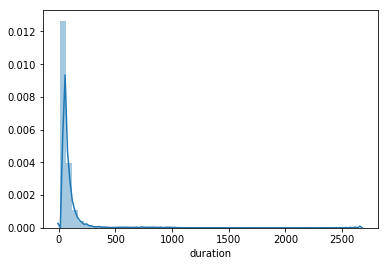

In [25]:

plt.figure()
sns.distplot(actDf[actDf['duration']>0]['duration'])
plt.show()

plt.figure()
sns.distplot(stressAct[stressAct['duration']>0]['duration'])
plt.show()

In [31]:
def addAct_to_sleep(row,card_):
    if row.name%1000 == 0:
        print(row.name,pd.to_datetime('now'))
    user = row['user_id']
    date = pd.to_datetime(row['activity_date']) - pd.DateOffset(1)
    #if user not in stressUsers:
    #    return np.nan
    res = stressAct[user:user].reset_index('user_id',drop=True)[date:date]
    res = res[res['cardtype']==card_]['duration']
    if len(res)>0:
        return res.values[0]
    else:
        return np.nan
print(stressSleep.iloc[100])
print(stressAct['72HUKnEBXH':'72HUKnEBXH'])
print(addAct_to_sleep(stressSleep.iloc[100],10))

Unnamed: 0                              100
user_id                          eG7UO547Cm
activity_start      2018-02-23 05:01:38.000
activity_end        2018-02-23 13:26:31.000
cardtype                                  4
autocreated                            True
gender                                 Male
city                           CARTERSVILLE
state_name                          Georgia
state_id                                 44
birthdate           1969-09-14 00:00:00.000
weight                                  245
height                                   72
duration                                504
local_start       2018-02-23 00:01:38-05:00
activity_date                    2018-02-23
age                                 48.4877
RHR                                     NaN
restless_mins                            16
bmi                                 34.0278
sleep_onset                               0
local_end         2018-02-23 08:26:31-05:00
wake_up                         

In [32]:
type_='Walk'
card_ = 38

stressSleep[type_] = stressSleep.apply(lambda row: addAct_to_sleep(row,card_),axis=1)

0 2018-03-06 19:36:44
1000 2018-03-06 19:36:45
2000 2018-03-06 19:36:47
3000 2018-03-06 19:36:49
4000 2018-03-06 19:36:51
5000 2018-03-06 19:36:52
6000 2018-03-06 19:36:54
7000 2018-03-06 19:36:55
8000 2018-03-06 19:36:57
9000 2018-03-06 19:36:59
10000 2018-03-06 19:37:00
11000 2018-03-06 19:37:02
12000 2018-03-06 19:37:04
13000 2018-03-06 19:37:05
14000 2018-03-06 19:37:07
15000 2018-03-06 19:37:09
16000 2018-03-06 19:37:10
17000 2018-03-06 19:37:12
18000 2018-03-06 19:37:14
19000 2018-03-06 19:37:16
20000 2018-03-06 19:37:17
21000 2018-03-06 19:37:19
22000 2018-03-06 19:37:21
23000 2018-03-06 19:37:22
24000 2018-03-06 19:37:24
25000 2018-03-06 19:37:26
26000 2018-03-06 19:37:28
27000 2018-03-06 19:37:29
28000 2018-03-06 19:37:31
29000 2018-03-06 19:37:33
30000 2018-03-06 19:37:34
31000 2018-03-06 19:37:36
32000 2018-03-06 19:37:38
33000 2018-03-06 19:37:40
34000 2018-03-06 19:37:41
35000 2018-03-06 19:37:43
36000 2018-03-06 19:37:45
37000 2018-03-06 19:37:46
38000 2018-03-06 19:37:48

In [86]:
#print(bmpDf)
bmpDf['epoch_start_date'] = pd.to_datetime(bmpDf['epoch_start_date'])
stressBpm = bmpDf[bmpDf['epoch_start_date'] >= pd.to_datetime('2018-02-03')]

stressBpm = stressBpm.reset_index(drop=True)
stressBpm = stressBpm.drop(['Unnamed: 0'],axis=1)
stressBpm = stressBpm.sort_values(by=['user_id','epoch_start_date'])
stressBpm['bpm_date'] = stressBpm['epoch_start_date'].apply(date_)
stressBpm = stressBpm.set_index(['user_id','bpm_date'])
stressBpm['05StFE1bqr':'05StFE1bqr'].reset_index('user_id',drop=True)[pd.to_datetime('2018-02-03').date():pd.to_datetime('2018-02-04').date()]
#stressBpm

epoch_start_utc  bpm    epoch_start_date  epoch_next_utc  gender  \
bpm_date                                                                       
2018-02-04       1517702460   79 2018-02-04 00:01:00    1.517703e+09  Female   
2018-02-04       1517702460   79 2018-02-04 00:01:00    1.517703e+09  Female   
2018-02-04       1517702580   81 2018-02-04 00:03:00    1.517703e+09  Female   
2018-02-04       1517702580   81 2018-02-04 00:03:00    1.517703e+09  Female   
2018-02-04       1517702700   72 2018-02-04 00:05:00    1.517703e+09  Female   
2018-02-04       1517702700   72 2018-02-04 00:05:00    1.517703e+09  Female   
2018-02-04       1517702820    0 2018-02-04 00:07:00    1.517703e+09  Female   
2018-02-04       1517702820    0 2018-02-04 00:07:00    1.517703e+09  Female   
2018-02-04       1517702940   90 2018-02-04 00:09:00    1.517703e+09  Female   
2018-02-04       1517702940   90 2018-02-04 00:09:00    1.517703e+09  Female   
2018-02-04       1517703000    0 2018-02-04 00:10:00    1.517703e+09  Female   
2018-02-04       1517703000    0 2018-02-04 00:10:00    1.517703e+09  Female   
2018-02-04       1517703060   67 2018-02-04 00:11:00    1.517703e+09  Female   
2018-02-04       1517703060   67 2018-02-04 00:11:00    1.517703e+09  Female   
2018-02-04       1517703120    0 2018-02-04 00:12:00    1.517703e+09  Female   
2018-02-04       1517703120    0 2018-02-04 00:12:00    1.517703e+09  Female   
2018-02-04       1517703180    0 2018-02-04 00:13:00    1.517703e+09  Female   
2018-02-04       1517703180    0 2018-02-04 00:13:00    1.517703e+09  Female   
2018-02-04       1517703240   67 2018-02-04 00:14:00    1.517703e+09  Female   
2018-02-04       1517703240   67 2018-02-04 00:14:00    1.517703e+09  Female   
2018-02-04       1517703300    0 2018-02-04 00:15:00    1.517703e+09  Female   
2018-02-04       1517703300    0 2018-02-04 00:15:00    1.517703e+09  Female   
2018-02-04       1517703360   67 2018-02-04 00:16:00    1.517703e+09  Female   
2018-02-04       1517703360   67 2018-02-04 00:16:00    1.517703e+09  Female   
2018-02-04       1517703420   67 2018-02-04 00:17:00    1.517704e+09  Female   
2018-02-04       1517703420   67 2018-02-04 00:17:00    1.517704e+09  Female   
2018-02-04       1517703600   55 2018-02-04 00:20:00    1.517704e+09  Female   
2018-02-04       1517703600   55 2018-02-04 00:20:00    1.517704e+09  Female   
2018-02-04       1517703720   70 2018-02-04 00:22:00    1.517704e+09  Female   
2018-02-04       1517703720   70 2018-02-04 00:22:00    1.517704e+09  Female   
...                     ...  ...                 ...             ...     ...   
2018-02-04       1517787000   86 2018-02-04 23:30:00    1.517787e+09  Female   
2018-02-04       1517787000   86 2018-02-04 23:30:00    1.517787e+09  Female   
2018-02-04       1517787120   80 2018-02-04 23:32:00    1.517787e+09  Female   
2018-02-04       1517787120   80 2018-02-04 23:32:00    1.517787e+09  Female   
2018-02-04       1517787240   52 2018-02-04 23:34:00    1.517787e+09  Female   
2018-02-04       1517787240   52 2018-02-04 23:34:00    1.517787e+09  Female   
2018-02-04       1517787360   85 2018-02-04 23:36:00    1.517787e+09  Female   
2018-02-04       1517787360   85 2018-02-04 23:36:00    1.517787e+09  Female   
2018-02-04       1517787480    0 2018-02-04 23:38:00    1.517788e+09  Female   
2018-02-04       1517787480    0 2018-02-04 23:38:00    1.517788e+09  Female   
2018-02-04       1517787600    0 2018-02-04 23:40:00    1.517788e+09  Female   
2018-02-04       1517787600    0 2018-02-04 23:40:00    1.517788e+09  Female   
2018-02-04       1517787720   56 2018-02-04 23:42:00    1.517788e+09  Female   
2018-02-04       1517787720   56 2018-02-04 23:42:00    1.517788e+09  Female   
2018-02-04       1517787840   85 2018-02-04 23:44:00    1.517788e+09  Female   
2018-02-04       1517787840   85 2018-02-04 23:44:00    1.517788e+09  Female   
2018-02-04       1517787960   64 2018-02-04 23:46:00    1.517788e+09  Female   
2018-02-04  

In [80]:
#stressBpm = stressBpm.reset_index().sort_values(by=['user_id','epoch_start_date'])

#stressBpm['bpm_date'] = stessBpm['epoch_start_date'].apply(date_)

#min(stressBpm.index.get_level_values(level=['bpm_date']))
#stressBpm = stressBpm.set_index(['user_id','bpm_date'])
#stressBpm['05StFE1bqr':'05StFE1bqr'].reset_index('user_id',drop=True)[pd.to_datetime('2018-02-03').date():pd.to_datetime('2018-02-04').date()]

Timestamp('2018-02-04 00:00:00')

In [ ]:
def addDHR_to_sleep(row,card_):
    if row.name%1000 == 0:
        print(row.name,pd.to_datetime('now'))
    user = row['user_id']
    date = pd.to_datetime(row['activity_date']) - pd.DateOffset(1)
    #if user not in stressUsers:
    #    return np.nan
    res = stressAct[user:user].reset_index('user_id',drop=True)[date:date]
    res = res[res['cardtype']==card_]['duration']
    if len(res)>0:
        return res.values[0]
    else:
        return np.nan

In [92]:
stressSleep.sort_values(['user_id','activity_start','activity_end']).drop_duplicates(['user_id','activity_start','activity_end'])

Unnamed: 0     user_id           activity_start  \
14565       14565  05StFE1bqr  2018-02-04 05:15:56.000   
46749       46749  05StFE1bqr  2018-02-05 02:10:58.000   
6665         6665  05StFE1bqr  2018-02-07 05:08:22.000   
34392       34392  05StFE1bqr  2018-02-08 02:46:15.000   
23631       23631  05StFE1bqr  2018-02-09 03:22:11.000   
20184       20184  05StFE1bqr  2018-02-10 04:52:22.000   
5902         5902  05StFE1bqr  2018-02-11 06:00:25.000   
12375       12375  05StFE1bqr  2018-02-12 04:40:40.000   
28859       28859  05StFE1bqr  2018-02-13 07:01:07.000   
46177       46177  05StFE1bqr  2018-02-14 03:42:10.000   
18234       18234  05StFE1bqr  2018-02-15 01:50:38.000   
13103       13103  05StFE1bqr  2018-02-16 03:31:39.000   
96             96  05StFE1bqr  2018-02-17 01:59:54.000   
39532       39532  05StFE1bqr  2018-02-18 01:43:53.000   
7538         7538  05StFE1bqr  2018-02-18 01:43:53.000   
3498         3498  05StFE1bqr  2018-02-19 02:54:14.000   
32669       32669  05StFE1bqr  2018-02-20 03:09:31.000   
18462       18462  05StFE1bqr  2018-02-21 02:35:12.000   
32259       32259  05StFE1bqr  2018-02-22 01:33:29.000   
37768       37768  05StFE1bqr  2018-02-23 01:07:01.000   
727           727  05StFE1bqr  2018-02-24 02:17:57.000   
29940       29940  05StFE1bqr  2018-02-25 02:47:57.000   
4479         4479  05StFE1bqr  2018-02-26 01:59:52.000   
5097         5097  05StFE1bqr  2018-02-27 03:49:51.000   
27813       27813  05u8ghMEHM  2018-02-25 04:48:36.000   
17880       17880  07SG23cg2s  2018-02-04 07:03:07.000   
23587       23587  07SG23cg2s  2018-02-05 05:23:28.000   
34455       34455  07SG23cg2s  2018-02-07 05:03:12.000   
20433       20433  07SG23cg2s  2018-02-08 05:43:40.000   
10658       10658  07SG23cg2s  2018-02-09 05:20:38.000   
...           ...         ...                      ...   
1975         1975  zvHvCIQAbo  2018-02-16 08:25:39.000   
47469       47469  zvHvCIQAbo  2018-02-17 05:53:54.000   
42055       42055  zvHvCIQAbo  2018-02-18 03:18:08.000   
2050         2050  zxAcgilJaJ  2018-02-04 03:56:18.000   
38401       38401  zxAcgilJaJ  2018-02-04 16:59:03.000   
37872       37872  zxAcgilJaJ  2018-02-05 02:16:36.000   
34214       34214  zxAcgilJaJ  2018-02-13 04:24:48.000   
10371       10371  zxAcgilJaJ  2018-02-13 21:51:57.000   
9204         9204  zxAcgilJaJ  2018-02-14 02:28:08.000   
14628       14628  zxAcgilJaJ  2018-02-14 16:15:43.000   
6849         6849  zxAcgilJaJ  2018-02-14 16:15:43.000   
8392         8392  zxAcgilJaJ  2018-02-15 02:38:45.000   
33287       33287  zxAcgilJaJ  2018-02-16 03:41:00.000   
9133         9133  zxAcgilJaJ  2018-02-17 06:25:15.000   
26843       26843  zxAcgilJaJ  2018-02-17 15:28:41.000   
20978       20978  zxAcgilJaJ  2018-02-18 06:24:12.000   
31120       31120  zxAcgilJaJ  2018-02-18 18:34:39.000   
37714       37714  zxAcgilJaJ  2018-02-19 05:59:10.000   
9290         9290  zxAcgilJaJ  2018-02-19 19:05:50.000   
16602       16602  zxAcgilJaJ  2018-02-20 05:47:34.000   
46729       46729  zxAcgilJaJ  2018-02-21 03:40:11.000   
37183       37183  zxAcgilJaJ  2018-02-21 20:44:17.000   
7610         7610  zxAcgilJaJ  2018-02-22 07:43:48.000   
31280       31280  zxAcgilJaJ  2018-02-22 17:58:55.000   
20864       20864  zxAcgilJaJ  2018-02-23 02:10:42.000   
32633       32633  zxAcgilJaJ  2018-02-23 18:29:39.000   
28301       28301  zxAcgilJaJ  2018-02-24 04:27:04.000   
45058       45058  zxAcgilJaJ  2018-02-25 06:05:53.000   
40789       40789  zxAcgilJaJ  2018-02-26 05:48:42.000   
24060       24060  zxAcgilJaJ  2018-02-27 06:34:37.000   

                  activity_end  cardtype  autocreated  gender         city  \
14565  2018-02-04 12:57:21.000         4         True  Female     BERKELEY   
46749  2018-02-05 11:32:29.000         4         True  Female     BERKELEY   
6665   2018-02-07 12:53:47.000         4         True  Female     BERKELEY   
34392  2018-02-08 11:55:45.000         4         True  Female     BERKELEY   
23631  2018-02-09 11

In [95]:
stressBpm.reset_index().drop_duplicates(['user_id','epoch_start_utc'])

user_id   bpm_date  epoch_start_utc  bpm    epoch_start_date  \
0         05StFE1bqr 2018-02-04       1517702460   79 2018-02-04 00:01:00   
2         05StFE1bqr 2018-02-04       1517702580   81 2018-02-04 00:03:00   
4         05StFE1bqr 2018-02-04       1517702700   72 2018-02-04 00:05:00   
6         05StFE1bqr 2018-02-04       1517702820    0 2018-02-04 00:07:00   
8         05StFE1bqr 2018-02-04       1517702940   90 2018-02-04 00:09:00   
10        05StFE1bqr 2018-02-04       1517703000    0 2018-02-04 00:10:00   
12        05StFE1bqr 2018-02-04       1517703060   67 2018-02-04 00:11:00   
14        05StFE1bqr 2018-02-04       1517703120    0 2018-02-04 00:12:00   
16        05StFE1bqr 2018-02-04       1517703180    0 2018-02-04 00:13:00   
18        05StFE1bqr 2018-02-04       1517703240   67 2018-02-04 00:14:00   
20        05StFE1bqr 2018-02-04       1517703300    0 2018-02-04 00:15:00   
22        05StFE1bqr 2018-02-04       1517703360   67 2018-02-04 00:16:00   
24        05StFE1bqr 2018-02-04       1517703420   67 2018-02-04 00:17:00   
26        05StFE1bqr 2018-02-04       1517703600   55 2018-02-04 00:20:00   
28        05StFE1bqr 2018-02-04       1517703720   70 2018-02-04 00:22:00   
30        05StFE1bqr 2018-02-04       1517703840    0 2018-02-04 00:24:00   
32        05StFE1bqr 2018-02-04       1517703960   71 2018-02-04 00:26:00   
34        05StFE1bqr 2018-02-04       1517704080    0 2018-02-04 00:28:00   
36        05StFE1bqr 2018-02-04       1517704200    0 2018-02-04 00:30:00   
38        05StFE1bqr 2018-02-04       1517704320   65 2018-02-04 00:32:00   
40        05StFE1bqr 2018-02-04       1517704440    0 2018-02-04 00:34:00   
42        05StFE1bqr 2018-02-04       1517704560   66 2018-02-04 00:36:00   
44        05StFE1bqr 2018-02-04       1517704680    0 2018-02-04 00:38:00   
46        05StFE1bqr 2018-02-04       1517704800    0 2018-02-04 00:40:00   
48        05StFE1bqr 2018-02-04       1517704920   81 2018-02-04 00:42:00   
50        05StFE1bqr 2018-02-04       1517704980    0 2018-02-04 00:43:00   
52        05StFE1bqr 2018-02-04       1517705040   81 2018-02-04 00:44:00   
54        05StFE1bqr 2018-02-04       1517705100   82 2018-02-04 00:45:00   
56        05StFE1bqr 2018-02-04       1517705160   83 2018-02-04 00:46:00   
58        05StFE1bqr 2018-02-04       1517705220   81 2018-02-04 00:47:00   
...              ...        ...              ...  ...                 ...   
17521341  zxAcgilJaJ 2018-02-26       1519631820   72 2018-02-26 07:57:00   
17521342  zxAcgilJaJ 2018-02-26       1519632300   73 2018-02-26 08:05:00   
17521343  zxAcgilJaJ 2018-02-26       1519632780   70 2018-02-26 08:13:00   
17521344  zxAcgilJaJ 2018-02-26       1519633260   74 2018-02-26 08:21:00   
17521345  zxAcgilJaJ 2018-02-26       1519633740   69 2018-02-26 08:29:00   
17521346  zxAcgilJaJ 2018-02-26       1519634220   73 2018-02-26 08:37:00   
17521347  zxAcgilJaJ 2018-02-26       1519634700   75 2018-02-26 08:45:00   
17521348  zxAcgilJaJ 2018-02-26       1519635180    0 2018-02-26 08:53:00   
17521349  zxAcgilJaJ 2018-02-26       1519635660   77 2018-02-26 09:01:00   
17521350  zxAcgilJaJ 2018-02-26       1519636140   72 2018-02-26 09:09:00   
17521351  zxAcgilJaJ 2018-02-26       1519636620   73 2018-02-26 09:17:00   
17521352  zxAcgilJaJ 2018-02-26       1519637100   67 2018-02-26 09:25:00   
17521353  zxAcgilJaJ 2018-02-26       1519637580   63 2018-02-26 09:33:00   
17521354  zxAcgilJaJ 2018-02-26       1519638060   66 2018-02-26 09:41:00   
17521355  zxAcgilJaJ 2018-02-26       1519638540   74 2018-02-26 09:49:00   
17521356  zxAcgilJaJ 2018-02-26       1519639020   78 2018-02-26 09:57:00   
17521357  zxAcgilJaJ 2018-02-26       1519639500    0 2018-02-26 10:05:00   
17521358  zxAcgilJaJ 2018-02-26       1519639980   90 2018-02-26 10:13:00   
17521359  zxAcgilJaJ 2018-02-26       1519640040   86 2018-02-26 10:14:00   
17521360  zxAcgilJaJ 2018-02-26       1519640100   84 2018-02-26 10:15:00   
17521361 

In [107]:
nm = 0
def tz_func(UTC_time,state):
    #global demo_demo, demo_row
    #demo_demo = row['activity_start']
    #demo_row = row['state_name']
    global nm
    if nm%100000 == 0:
            print(nm,pd.to_datetime('now'))
    nm+=1
    if state == 'U.S. Armed Forces - Europe' or state == 'U.S. Armed Forces - Americas':
        return UTC_time.tz_localize('UTC').tz_convert(us.states.lookup('California').time_zones[0])
    else:
        if us.states.lookup(state):
            return UTC_time.tz_localize('UTC').tz_convert(us.states.lookup(state).time_zones[0])
        else:
            return np.nan

stressBpm['epoch_start_local'] = stressBpm.apply(lambda row:tz_func(row['epoch_start_date'],row['state']),axis=1)

0 2018-03-07 00:19:09
100000 2018-03-07 00:19:25
200000 2018-03-07 00:19:42
300000 2018-03-07 00:20:00
400000 2018-03-07 00:20:17
500000 2018-03-07 00:20:34
600000 2018-03-07 00:20:51
700000 2018-03-07 00:21:08
800000 2018-03-07 00:21:25
900000 2018-03-07 00:21:41
1000000 2018-03-07 00:21:57
1100000 2018-03-07 00:22:13
1200000 2018-03-07 00:22:31
1300000 2018-03-07 00:22:48
1400000 2018-03-07 00:23:04
1500000 2018-03-07 00:23:21
1600000 2018-03-07 00:23:37
1700000 2018-03-07 00:23:54
1800000 2018-03-07 00:24:10
1900000 2018-03-07 00:24:27
2000000 2018-03-07 00:24:44
2100000 2018-03-07 00:25:00
2200000 2018-03-07 00:25:17
2300000 2018-03-07 00:25:34
2400000 2018-03-07 00:25:50
2500000 2018-03-07 00:26:07
2600000 2018-03-07 00:26:23
2700000 2018-03-07 00:26:41
2800000 2018-03-07 00:26:58
2900000 2018-03-07 00:27:15
3000000 2018-03-07 00:27:32
3100000 2018-03-07 00:27:49
3200000 2018-03-07 00:28:06
3300000 2018-03-07 00:28:23
3400000 2018-03-07 00:28:40
3500000 2018-03-07 00:28:57
3600000

In [104]:
print(stressBpm.iloc[1000,:]['epoch_start_date'])
print(stressBpm.iloc[1000,:]['state'])
print(stressBpm.iloc[1000,:]['epoch_start_date'].tz_localize('UTC').tz_convert(us.states.lookup(stressBpm.iloc[1000,:]['state']).time_zones[0]))

2018-02-04 19:00:00
California
2018-02-04 11:00:00-08:00


In [119]:
stressBpm['05StFE1bqr':'05StFE1bqr'].reset_index('user_id',drop=True)[pd.to_datetime('2018-02-04').date():pd.to_datetime('2018-02-04').date()]

epoch_start_utc  bpm    epoch_start_date  epoch_next_utc  gender  \
bpm_date                                                                       
2018-02-04       1517702460   79 2018-02-04 00:01:00    1.517703e+09  Female   
2018-02-04       1517702460   79 2018-02-04 00:01:00    1.517703e+09  Female   
2018-02-04       1517702580   81 2018-02-04 00:03:00    1.517703e+09  Female   
2018-02-04       1517702580   81 2018-02-04 00:03:00    1.517703e+09  Female   
2018-02-04       1517702700   72 2018-02-04 00:05:00    1.517703e+09  Female   
2018-02-04       1517702700   72 2018-02-04 00:05:00    1.517703e+09  Female   
2018-02-04       1517702820    0 2018-02-04 00:07:00    1.517703e+09  Female   
2018-02-04       1517702820    0 2018-02-04 00:07:00    1.517703e+09  Female   
2018-02-04       1517702940   90 2018-02-04 00:09:00    1.517703e+09  Female   
2018-02-04       1517702940   90 2018-02-04 00:09:00    1.517703e+09  Female   
2018-02-04       1517703000    0 2018-02-04 00:10:00    1.517703e+09  Female   
2018-02-04       1517703000    0 2018-02-04 00:10:00    1.517703e+09  Female   
2018-02-04       1517703060   67 2018-02-04 00:11:00    1.517703e+09  Female   
2018-02-04       1517703060   67 2018-02-04 00:11:00    1.517703e+09  Female   
2018-02-04       1517703120    0 2018-02-04 00:12:00    1.517703e+09  Female   
2018-02-04       1517703120    0 2018-02-04 00:12:00    1.517703e+09  Female   
2018-02-04       1517703180    0 2018-02-04 00:13:00    1.517703e+09  Female   
2018-02-04       1517703180    0 2018-02-04 00:13:00    1.517703e+09  Female   
2018-02-04       1517703240   67 2018-02-04 00:14:00    1.517703e+09  Female   
2018-02-04       1517703240   67 2018-02-04 00:14:00    1.517703e+09  Female   
2018-02-04       1517703300    0 2018-02-04 00:15:00    1.517703e+09  Female   
2018-02-04       1517703300    0 2018-02-04 00:15:00    1.517703e+09  Female   
2018-02-04       1517703360   67 2018-02-04 00:16:00    1.517703e+09  Female   
2018-02-04       1517703360   67 2018-02-04 00:16:00    1.517703e+09  Female   
2018-02-04       1517703420   67 2018-02-04 00:17:00    1.517704e+09  Female   
2018-02-04       1517703420   67 2018-02-04 00:17:00    1.517704e+09  Female   
2018-02-04       1517703600   55 2018-02-04 00:20:00    1.517704e+09  Female   
2018-02-04       1517703600   55 2018-02-04 00:20:00    1.517704e+09  Female   
2018-02-04       1517703720   70 2018-02-04 00:22:00    1.517704e+09  Female   
2018-02-04       1517703720   70 2018-02-04 00:22:00    1.517704e+09  Female   
...                     ...  ...                 ...             ...     ...   
2018-02-04       1517787000   86 2018-02-04 23:30:00    1.517787e+09  Female   
2018-02-04       1517787000   86 2018-02-04 23:30:00    1.517787e+09  Female   
2018-02-04       1517787120   80 2018-02-04 23:32:00    1.517787e+09  Female   
2018-02-04       1517787120   80 2018-02-04 23:32:00    1.517787e+09  Female   
2018-02-04       1517787240   52 2018-02-04 23:34:00    1.517787e+09  Female   
2018-02-04       1517787240   52 2018-02-04 23:34:00    1.517787e+09  Female   
2018-02-04       1517787360   85 2018-02-04 23:36:00    1.517787e+09  Female   
2018-02-04       1517787360   85 2018-02-04 23:36:00    1.517787e+09  Female   
2018-02-04       1517787480    0 2018-02-04 23:38:00    1.517788e+09  Female   
2018-02-04       1517787480    0 2018-02-04 23:38:00    1.517788e+09  Female   
2018-02-04       1517787600    0 2018-02-04 23:40:00    1.517788e+09  Female   
2018-02-04       1517787600    0 2018-02-04 23:40:00    1.517788e+09  Female   
2018-02-04       1517787720   56 2018-02-04 23:42:00    1.517788e+09  Female   
2018-02-04       1517787720   56 2018-02-04 23:42:00    1.517788e+09  Female   
2018-02-04       1517787840   85 2018-02-04 23:44:00    1.517788e+09  Female   
2018-02-04       1517787840   85 2018-02-04 23:44:00    1.517788e+09  Female   
2018-02-04       1517787960   64 2018-02-04 23:46:00    1.517788e+09  Female   
2018-02-04  

In [133]:
tempDf = stressBpm['05StFE1bqr':'05StFE1bqr'].reset_index('user_id',drop=True)[pd.to_datetime('2018-02-04').date():pd.to_datetime('2018-02-05').date()].reset_index(drop=True)
#print(tempDf.shape)
#tempDf

reqBPM = tempDf[np.logical_and(tempDf['epoch_start_date'] >= pd.to_datetime('2018-02-04 17:00:00'),tempDf['epoch_start_date'] <= pd.to_datetime('2018-02-05 01:00:00'))]['bpm']
reqBPM.quantile(0.2,interpolation='lower')

0

In [147]:
bpmDates = []
for dt in pd.date_range('2018-02-04','2018-02-27'):
    bpmDates.append(str(dt.date()))
print(bpmDates)
bpmTimes = ['17:00:00','01:00:00']
print(bpmTimes)

['2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26', '2018-02-27']
['17:00:00', '01:00:00']


In [146]:
bpmUsers = stressBpm.reset_index()['user_id'].unique()
bpmUsers

array(['05StFE1bqr', '05u8ghMEHM', '07SG23cg2s', ..., 'zuRORSq7to',
       'zvHvCIQAbo', 'zxAcgilJaJ'], dtype=object)

In [173]:
tempDict = {}
c = 0
for user in bpmUsers:
    if c%50==0:
        print(c)
    c+=1
    #print(user)
    userBpm = stressBpm[user:user].reset_index('user_id',drop=True)
    tempDict[user] = {}
    for i in range(len(bpmDates)-1):
        tempDict[user][bpmDates[i]] = {}
        reqBpm = userBpm[np.logical_and(userBpm['epoch_start_date'] >= pd.to_datetime(bpmDates[i] +' ' + bpmTimes[0]),userBpm['epoch_start_date'] <= pd.to_datetime(bpmDates[i+1] +' ' + bpmTimes[1]))]['bpm']
        tempDict[user][bpmDates[i]]['10'] = reqBpm.quantile(0.1,interpolation='lower')
        tempDict[user][bpmDates[i]]['20'] = reqBpm.quantile(0.2,interpolation='lower')
        tempDict[user][bpmDates[i]]['30'] = reqBpm.quantile(0.3,interpolation='lower')
        tempDict[user][bpmDates[i]]['40'] = reqBpm.quantile(0.4,interpolation='lower')
        tempDict[user][bpmDates[i]]['50'] = reqBpm.quantile(0.5,interpolation='lower')
print(tempDict)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
{'05StFE1bqr': {'2018-02-04': {'10': 0, '20': 0, '30': 0, '40': 65, '50': 75}, '2018-02-05': {'10': 0, '20': 0, '30': 64, '40': 77, '50': 78}, '2018-02-06': {'10': 0, '20': 0, '30': 0, '40': 0, '50': 69}, '2018-02-07': {'10': 0, '20': 0, '30': 57, '40': 64, '50': 73}, '2018-02-08': {'10': 0, '20': 0, '30': 0, '40': 60, '50': 67}, '2018-02-09': {'10': 0, '20': 0, '30': 0, '40': 57, '50': 70}, '2018-02-10': {'10': 0, '20': 0, '30': 0, '40': 72, '50': 79}, '2018-02-11': {'10': 0, '20': 0, '30': 0, '40': 64, '50': 72}, '2018-02-12': {'10': 0, '20': 0, '30': 0, '40': 0, '50': 71}, '2018-02-13': {'10': 0, '20': 0, '30': 0, '40': 61, '50': 68}, '2018-02-14': {'10': 0, '20': 0, '30': 0, '40': 69, '50': 75}, '2018-02-15': {'10': 0, '20': 0, '30': 0, '40': 59, '50': 75}, '2018-02-16': {'10': 0, '20': 0, '30': 0, '40': 62, '50': 68}, '2018-02

In [174]:
def addDHR_to_sleep(user,date_,q):
    if user in tempDict:
        if date_ in tempDict[user]:
            return tempDict[user][date_][q]
    return np.nan

addDHR_to_sleep(stressSleep.iloc[10]['user_id'],stressSleep.iloc[10]['activity_date'],'50')

86

In [175]:
stressSleep['DHR_10'] = stressSleep.apply(lambda row:addDHR_to_sleep(row['user_id'],row['activity_date'],'10'),axis=1)
stressSleep['DHR_20'] = stressSleep.apply(lambda row:addDHR_to_sleep(row['user_id'],row['activity_date'],'20'),axis=1)
stressSleep['DHR_30'] = stressSleep.apply(lambda row:addDHR_to_sleep(row['user_id'],row['activity_date'],'30'),axis=1)
stressSleep['DHR_40'] = stressSleep.apply(lambda row:addDHR_to_sleep(row['user_id'],row['activity_date'],'40'),axis=1)
stressSleep['DHR_50'] = stressSleep.apply(lambda row:addDHR_to_sleep(row['user_id'],row['activity_date'],'50'),axis=1)

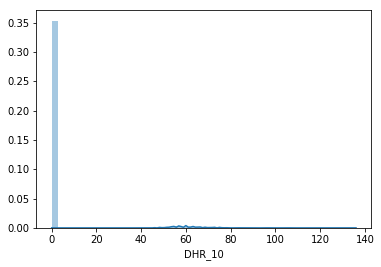

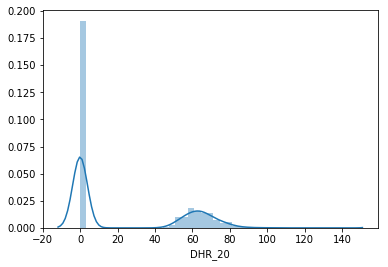

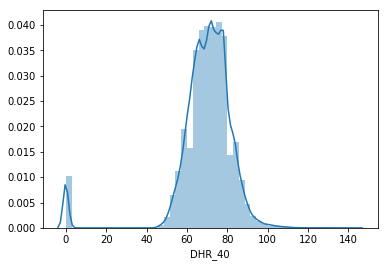

In [176]:
plt.figure()
sns.distplot(stressSleep['DHR_10'].dropna())
plt.show()

plt.figure()
sns.distplot(stressSleep['DHR_20'].dropna())
plt.show()

plt.figure()
sns.distplot(stressSleep['DHR_30'].dropna())
plt.show()

plt.figure()
sns.distplot(stressSleep['DHR_40'].dropna())
plt.show()

plt.figure()
sns.distplot(stressSleep['DHR_50'].dropna())
plt.show()

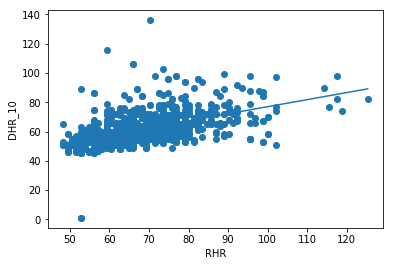

R: 0.51949499667  P: 2.59029319674e-94


R: 0.543386551659  P: 0.0


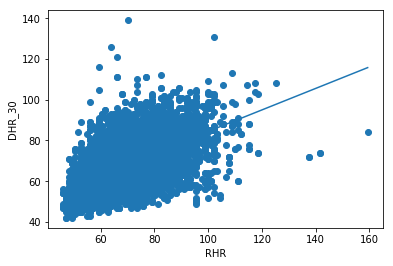

R: 0.605916696655  P: 0.0


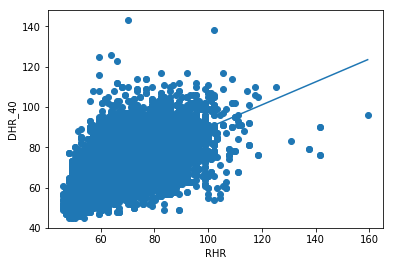

R: 0.628740124133  P: 0.0


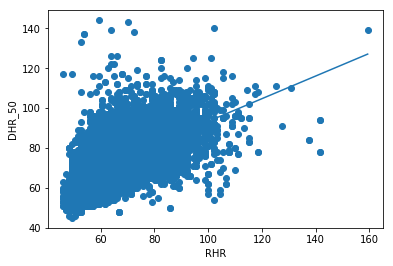

R: 0.61857311366  P: 0.0


In [188]:
import scipy

tempDf = stressSleep[['RHR','DHR_10']].dropna()
plt.figure()
X = tempDf[tempDf['DHR_10']>0]['RHR']
Y = tempDf[tempDf['DHR_10']>0]['DHR_10']
plt.scatter(X,Y)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('RHR')
plt.ylabel('DHR_10')
plt.show()

rVal, pVal = scipy.stats.pearsonr(X,Y)
print('R:',rVal,' P:',pVal)

tempDf = stressSleep[['RHR','DHR_20']].dropna()
plt.figure()
X = tempDf[tempDf['DHR_20']>0]['RHR']
Y = tempDf[tempDf['DHR_20']>0]['DHR_20']
plt.scatter(X,Y)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('RHR')
plt.ylabel('DHR_20')
plt.show()

rVal, pVal = scipy.stats.pearsonr(X,Y)
print('R:',rVal,' P:',pVal)

tempDf = stressSleep[['RHR','DHR_30']].dropna()
plt.figure()
X = tempDf[tempDf['DHR_30']>0]['RHR']
Y = tempDf[tempDf['DHR_30']>0]['DHR_30']
plt.scatter(X,Y)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('RHR')
plt.ylabel('DHR_30')
plt.show()

rVal, pVal = scipy.stats.pearsonr(X,Y)
print('R:',rVal,' P:',pVal)

tempDf = stressSleep[['RHR','DHR_40']].dropna()
plt.figure()
X = tempDf[tempDf['DHR_40']>0]['RHR']
Y = tempDf[tempDf['DHR_40']>0]['DHR_40']
plt.scatter(X,Y)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('RHR')
plt.ylabel('DHR_40')
plt.show()

rVal, pVal = scipy.stats.pearsonr(X,Y)
print('R:',rVal,' P:',pVal)

tempDf = stressSleep[['RHR','DHR_50']].dropna()
plt.figure()
X = tempDf[tempDf['DHR_50']>0]['RHR']
Y = tempDf[tempDf['DHR_50']>0]['DHR_50']
plt.scatter(X,Y)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('RHR')
plt.ylabel('DHR_50')
plt.show()

rVal, pVal = scipy.stats.pearsonr(X,Y)
print('R:',rVal,' P:',pVal)


In [189]:
pd.read_dict(tempDict)

AttributeError: module 'pandas' has no attribute 'read_dict'